
# Project: Data Analysis of Movies in 1995 and 2010

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### in this project we are going how is the cinema industry changed through 15years, in order to do so we are going to do some comparison between the scene in 1995 and 2010.

##### we are trying to answer these question:

##### 1 -what is the most produced genere in 1995 and 2010
##### 2 - does the budget of the film making increased in general or not? 
##### 3 - what are the features affecting the imdb rating


In [27]:
# import pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("movies.csv")
df.head(3)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [142]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
df.isnull().sum() #checing the null values 

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [5]:
#checking the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [6]:
#statsical description of the data
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


#### the budget, revenue, and runtime can't be equal to zero

In [7]:
# checking the duplicated rows
df.duplicated().sum()

0

### Data Cleaning 

In [8]:
# drop irrelvant columns
df.drop(columns = ["homepage","id","keywords","original_language","production_companies","production_countries","spoken_languages","status","tagline","original_title","overview"],inplace =True)

In [9]:
df.head() #data frame head

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124


In [10]:
df.isnull().sum() #checking the null values

budget          0
genres          0
popularity      0
release_date    1
revenue         0
runtime         2
title           0
vote_average    0
vote_count      0
dtype: int64

#### only runtime and release date have null values, we can drop these rows

In [11]:
# since the null values are so little, we gonna drop the rows with null values
df.dropna(axis = 0, inplace = True)
df.isnull().sum() #checking the null values after dropping
# no null values

budget          0
genres          0
popularity      0
release_date    0
revenue         0
runtime         0
title           0
vote_average    0
vote_count      0
dtype: int64

In [14]:
# replace the zero values for budget, revenue, and runtime columns
#columns = ['runtime','budget','revenue']
df['runtime'].replace(0,df['runtime'].mean(), inplace = True)
df['budget'].replace(0.0,df['budget'].mean(), inplace = True)
df['revenue'].replace(0,df['revenue'].mean(), inplace = True)
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.800000e+03,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,3.533220e+07,21.505569,1.067313e+08,107.655320,6.094458,690.646875
std,3.791177e+07,31.822163,1.546866e+08,20.675889,1.188366,1234.852449
min,1.000000e+00,0.000372,5.000000e+00,14.000000,0.000000,0.000000
25%,1.200000e+07,4.682212,2.758125e+07,94.000000,5.600000,54.000000
50%,2.906007e+07,12.928897,8.231205e+07,104.000000,6.200000,236.000000
75%,4.000000e+07,28.350628,9.293886e+07,118.000000,6.800000,737.250000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [16]:
#change the release_date in datetime 
df['release_date']= pd.to_datetime(df['release_date'])
type(df['release_date'][0]) #check the data type

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
type(df["genres"][0]) # the generes are string, and list contains dictionary

str

In [18]:
import ast #library which has literal_eval, to change str to list

In [19]:

df['genres'] =df['genres'].apply(ast.literal_eval) # to convert the string into a list to iterate over it

# a function to the value of the "name" key in each dictionary
def get_name(col):
        names = [i['name'] for i in col]
        names = names[:1]
        return names
    
#function converts the list into a string, to iterate over it
def to_string(Str):  
    string = " "  
    return (string.join(Str))
    

df['genres'] = df['genres'].apply(get_name)



df['genres'] = df['genres'].apply(to_string)


In [20]:
df['genres'] #we choose only the 1st genere for each film

0                Action
1             Adventure
2                Action
3                Action
4                Action
5               Fantasy
6             Animation
7                Action
8             Adventure
9                Action
10            Adventure
11            Adventure
12            Adventure
13               Action
14               Action
15            Adventure
16      Science Fiction
17            Adventure
18               Action
19               Action
20               Action
21               Action
22            Adventure
23            Adventure
24            Adventure
25                Drama
26            Adventure
27             Thriller
28               Action
29               Action
             ...       
4773             Comedy
4774              Drama
4775              Drama
4776             Comedy
4777              Drama
4778             Action
4779             Comedy
4780           Thriller
4781             Comedy
4782              Drama
4783           T

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1:
### The effect of the new century !
#### Did the viewers taste change ? What did they like in 1995 and what do they like in 2010?

In [21]:
df['year']= pd.DatetimeIndex(df['release_date']).year #to get only the release year instead of the whole date
df["year"].unique().max() # the most recent film in the data set is 2017

2017

#### we gonna create a seperate data frame for the year 1995 and another one for the year 2010

In [23]:
df_95 = df[df['year']==1995] # a data frame which contains the films released in 1995
df_95.head()
df_95.nunique() #no. of unique values in each column

budget          43
genres          14
popularity      70
release_date    54
revenue         60
runtime         43
title           70
vote_average    27
vote_count      68
year             1
dtype: int64

In [24]:
df_2010 = df[df['year']==2010] # a data frame which contains the films released in 2010
df_2010.nunique() #no. of unique values in each column

budget           86
genres           17
popularity      225
release_date    142
revenue         172
runtime          59
title           225
vote_average     44
vote_count      196
year              1
dtype: int64

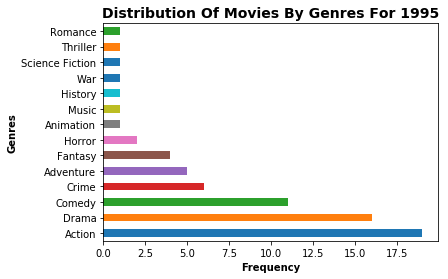

In [32]:
# what is the most produced genres in 1995 and 2020
df_95["genres"].value_counts().plot(kind ="barh");
# Add title and format it
plt.title('Distribution of Movies by Genres for 1995'.title(),
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel('Frequency'.title(),
               fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel('Genres'.title(),
               fontsize = 10, weight = "bold");


#### Drama and Action are the highest 2 generes in 1995

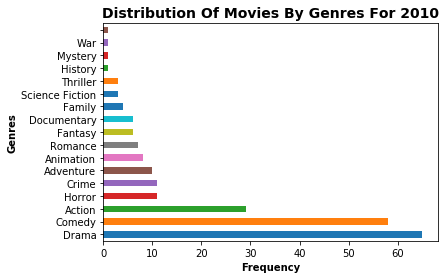

In [33]:
df_2010["genres"].value_counts().plot(kind ="barh");
# Add title and format it
plt.title('Distribution of Movies by Genres for 2010'.title(),
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel('Frequency'.title(),
               fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel('Genres'.title(),
               fontsize = 10, weight = "bold");


#### Drama and comdey are the highest 2 geners in 2010

### Assumption
#### we gonna assume that any movie with average tare higher than 7 is a good movie, that the viewer liked

In [34]:
# movies with rating more than 7 in both years
liked_95 = df_95[df["vote_average"]>= 7]
liked_2010 = df_2010[df["vote_average"]>= 7]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


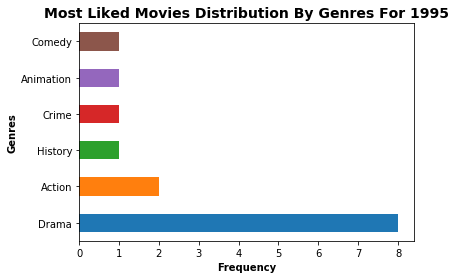

In [35]:
# most liked genere in 1995, 2010
liked_95["genres"].value_counts().plot(kind ="barh");
# Add title and format it
plt.title('most liked Movies Distribution by Genres for 1995'.title(),
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel('Frequency'.title(),
               fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel('Genres'.title(),
               fontsize = 10, weight = "bold");

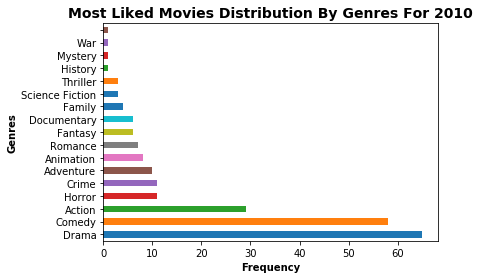

In [37]:
df_2010["genres"].value_counts().plot(kind ="barh");
# Add title and format it
plt.title('most liked Movies Distribution by Genres for 2010'.title(),
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel('Frequency'.title(),
               fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel('Genres'.title(),
               fontsize = 10, weight = "bold");

#### Drama is the most liked genere in both 1995 and 2010

## Answer of Question (1)
#### 1- we can see that people didn't liked the comedy movies in 1995, given that comedy was the 2nd most produced genere
#### 2- drama is most loved genere in both years

#### 3- we can see that on 2010, Drama became the most produced type of movies and comedy is the 2nd, while in 1995 Action has the 1st place and drama was in the second place.
#### 4- we can notice also that no. of produced in 2010 is 3 times more that those produced in 1995

### Limitiation of this conclusion:
#### The registered movies in the dataset in the year 1995 is nearly third the number of the movies registerd in 2010,
#### this inbalance could lead to unaccurate conclusion , maybe if we have a more representing sample for the year 1995,
#### we could have different results, especially the comedy is coming at the last place , which could raise some doubts

### Research Question 2: Does the budget of the film making increased in general or not? 

In [209]:
print('the average production budget in 1995',df_95["budget"].mean(),"USD")
print('the average production budget in 2010',df_2010["budget"].mean(),"USD")


the average production budget in 1995 34385009.8321 USD
the average production budget in 2010 39661645.2533 USD


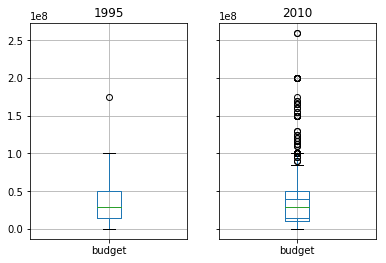

In [42]:
df.query("year in [1995,2010]").groupby("year").boxplot(column = "budget"); # 2 boxplots besides each other


#### Average of budget of both years are nearly the same, with little increase in median of the year 2010

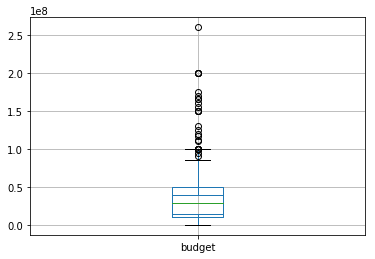

In [43]:
df_95.boxplot(column=['budget'])
df_2010.boxplot(column=['budget']);# 2boxplots over each other to show how simillar they are


In [44]:
df_95["budget"].describe() #statisitical describtion of the 95 movies with median of 3.4 and std of 2.8 


count    7.000000e+01
mean     3.438501e+07
std      2.820477e+07
min      8.000000e+00
25%      1.462500e+07
50%      2.906007e+07
75%      5.000000e+07
max      1.750000e+08
Name: budget, dtype: float64

In [46]:
df_2010["budget"].describe()

count    2.250000e+02
mean     3.966165e+07
std      4.533065e+07
min      6.500000e+04
25%      1.000000e+07
50%      2.906007e+07
75%      4.000000e+07
max      2.600000e+08
Name: budget, dtype: float64

#### the no. of movies in 2010 is more representative, that's why we can guarantee the 2010 results more than 1995 

###  Answer of Question(2)
#### we can say the budget of both years are nearly equal , however there is increase in the budgets in 2010

### Limitation:
#### the sample in 1995 consists of only 7 observation which is not gonna be accurate in future statistical test and statistical obserations

## Question 3:
### Does increasing the budget lead to higher average votes?

In [49]:
import seaborn as sns #import seaborn library to plot a heat map

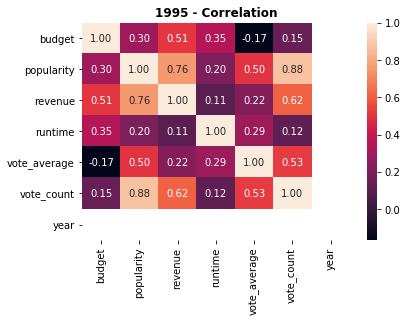

In [51]:

sns.heatmap(df_95.corr(),annot = True, fmt = ".2f"); #plot a heat map of the correlation between the features
plt.title("1995 - correlation".title(),weight = "bold");

#### correlation of 0.35 between budget and vote average in year 1995, low correlation

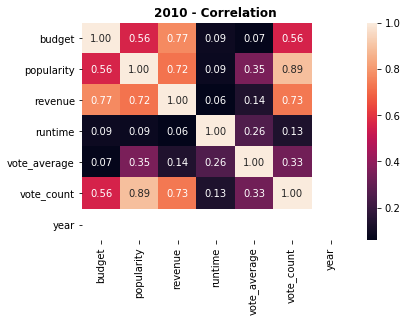

In [52]:
sns.heatmap(df_2010.corr(),annot = True, fmt = ".2f");
plt.title("2010 - correlation".title(),weight = "bold");#plot a heat map of the correlation between the features

#### correlation of nearly zero between budget and vote average in year 2010,  no correlation

### Answer of Question(3)
#### we can say that the budget has nearly zero correlation with the average vote of the viewers in year 2010, so increasing the budget won't guarrenty that the viewers gonna love the movie.
#### Limitation: the extreme low value of observations in year 1995, affect the accuracy of the correlation, i think if we have more observation in this year, the correlation is going to be less 0.35 and gonna be similar to 2 

<a id='conclusions'></a>
## Conclusions
#### 1- we can see that people didn't liked the comedy movies in 1995, given that comedy was the 2nd most produced genere
#### 2- drama is most loved genere in both years
#### 3- we can see that on 2010, Drama became the most produced type of movies and comedy is the 2nd, while in 1995 Action has the 1st place and drama was in the second place.
#### 4- we can notice also that no. of produced in 2010 is 3 times more that those produced in 1995
#### 5- we can say the budget of both years (1995-2010) are nearly equal , however there is increase in the budgets in 2010
#### 6-we can say that the budget has nearly zero correlation with the average vote of the viwers, so increasing the budget won't guarrenty that the viewers gonna love the movie.

## Limitation
#### 1- there inbalance in the number of movies between 1995 and 2010, which is extremly biased towards 2010, that's why we need more data for the year 1995
#### 2- we won't be able to get accurate results from stastical tests in the year of 1995, because there are no enough observations



In [214]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0